In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

# **BINNING**



In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ["T13","T12", "T12", "T2", "T25", "T14", "T29", "T15", "T17"]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df["CLASSIFICATION"].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification = application_df["CLASSIFICATION"].value_counts()
classification[classification > 1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_keep = ["C1000", "C2000", "C3000", "C1200", "C2100", "C7000"]
classifications_to_replace = list(set(application_df["CLASSIFICATION"]) - set(classifications_to_keep))

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [9]:
# Create a list of all the categorical columns
application_cat = application_df[["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE",
                                         "ORGANIZATION", "SPECIAL_CONSIDERATIONS", "INCOME_AMT"]]

# Convert categorical data to numeric with `pd.get_dummies`
dummies = pd.get_dummies(application_df[["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE",
                                         "ORGANIZATION", "SPECIAL_CONSIDERATIONS", "INCOME_AMT"]])

# Merge the encoded data and drop the originals
application_df = application_df.merge(dummies, left_index=True, right_index=True)
application_df= application_df.drop(columns = application_cat)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,SPECIAL_CONSIDERATIONS_Y,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,1,5000,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# **Model 1**

In [10]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL")
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 45
hidden_nodes_layer1 =  200
hidden_nodes_layer2 = 150
hidden_nodes_layer2 = 100

nn_1 = tf.keras.models.Sequential()

# First hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_input_features,
                             activation="tanh"))

# Second hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="relu"))
# # Third hidden layer
nn_1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="relu"))

# Output layer
nn_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               9200      
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 39501 (154.30 KB)
Trainable params: 39501 (154.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
nn_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
# Train the model
fit_model_1 = nn_1.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 5ms/step - loss: 0.5664 - accuracy: 0.7242
Epoch 2/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5571 - accuracy: 0.7298
Epoch 3/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5547 - accuracy: 0.7290
Epoch 4/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5534 - accuracy: 0.7324
Epoch 5/100
804/804 [==============================] - 5s 7ms/step - loss: 0.5504 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 5s 6ms/step - loss: 0.5500 - accuracy: 0.7346
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5493 - accuracy: 0.7329
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7344
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5474 - accuracy: 0.7339
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5465 - accura

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5688 - accuracy: 0.7247 - 543ms/epoch - 2ms/step
Loss: 0.5687575340270996, Accuracy: 0.7246647477149963


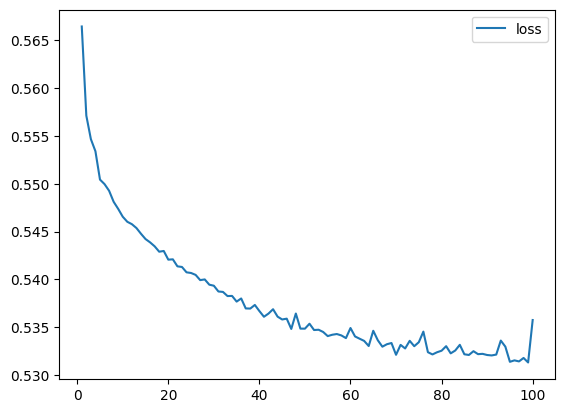

In [15]:
# Create a DataFrame containing training history
history_df_1 = pd.DataFrame(fit_model_1.history)

# Increase the index by 1 to match the number of epochs
history_df_1.index += 1

# Plot the loss
history_df_1.plot(y="loss")
plt.show()

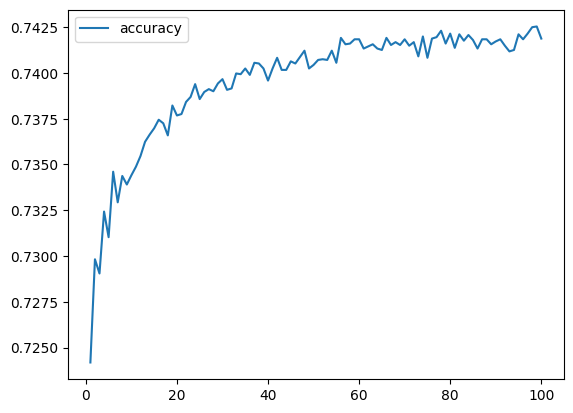

In [16]:
# Plot the accuracy
history_df_1.plot(y="accuracy")
plt.show()

In [17]:
# Export our model to HDF5 file
nn_1.save("AlphabetSoupCharity_Optimization1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Model 2**

In [18]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL")
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 45
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 80


nn_2 = tf.keras.models.Sequential()

# First hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_input_features,
                             activation="tanh"))

# Second hidden layer
nn_2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="relu"))
# Output layer
nn_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 90)                4140      
                                                                 
 dense_5 (Dense)             (None, 80)                7280      
                                                                 
 dense_6 (Dense)             (None, 1)                 81        
                                                                 
Total params: 11501 (44.93 KB)
Trainable params: 11501 (44.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Compile the model
nn_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
fit_model_2 = nn_2.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
536/536 [==============================] - 2s 2ms/step - loss: 0.5727 - accuracy: 0.7158
Epoch 2/50
536/536 [==============================] - 1s 3ms/step - loss: 0.5567 - accuracy: 0.7287
Epoch 3/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5534 - accuracy: 0.7319
Epoch 4/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7321
Epoch 5/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5504 - accuracy: 0.7319
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5487 - accuracy: 0.7344
Epoch 7/50
536/536 [==============================] - 2s 4ms/step - loss: 0.5483 - accuracy: 0.7331
Epoch 8/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5479 - accuracy: 0.7333
Epoch 9/50
536/536 [==============================] - 1s 3ms/step - loss: 0.5466 - accuracy: 0.7345
Epoch 10/50
536/536 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7350

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

536/536 - 1s - loss: 0.5593 - accuracy: 0.7268 - 854ms/epoch - 2ms/step
Loss: 0.5592661499977112, Accuracy: 0.7267638444900513


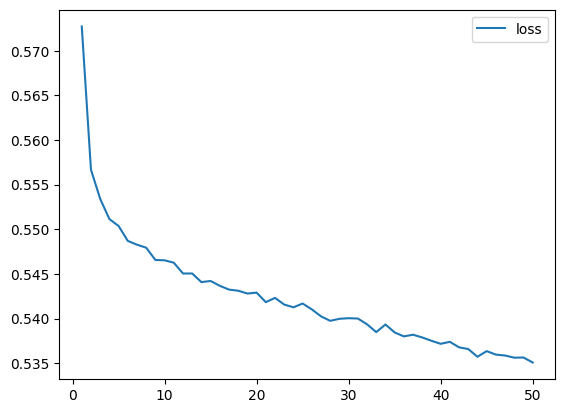

In [23]:
# Create a DataFrame containing training history
history_df_2 = pd.DataFrame(fit_model_2.history)

# Increase the index by 1 to match the number of epochs
history_df_2.index += 1

# Plot the loss
history_df_2.plot(y="loss")
plt.show()

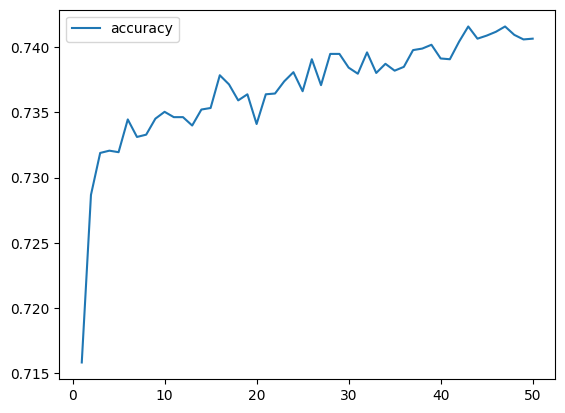

In [24]:
# Plot the accuracy
history_df_2.plot(y="accuracy")
plt.show()

In [25]:
# Export our model to HDF5 file
nn_2.save("AlphabetSoupCharity_Optimization2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Model 3**

In [45]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(columns="IS_SUCCESSFUL")
y = application_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 45
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 80
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 60


nn_3 = tf.keras.models.Sequential()

# First hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
                             input_dim=number_input_features,
                             activation="tanh"))

# Second hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="leaky_relu"))

# Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2,
                             activation="tanh"))

# # Third hidden layer
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3,
                             activation="leaky_relu"))
# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 100)               4600      
                                                                 
 dense_43 (Dense)            (None, 60)                6060      
                                                                 
 dense_44 (Dense)            (None, 60)                3660      
                                                                 
 dense_45 (Dense)            (None, 60)                3660      
                                                                 
 dense_46 (Dense)            (None, 1)                 61        
                                                                 
Total params: 18041 (70.47 KB)
Trainable params: 18041 (70.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
# Train the model
fit_model_3 = nn_3.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
644/644 [==============================] - 4s 4ms/step - loss: 0.5673 - accuracy: 0.7223
Epoch 2/10
644/644 [==============================] - 2s 3ms/step - loss: 0.5582 - accuracy: 0.7286
Epoch 3/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5546 - accuracy: 0.7296
Epoch 4/10
644/644 [==============================] - 2s 3ms/step - loss: 0.5527 - accuracy: 0.7317
Epoch 5/10
644/644 [==============================] - 2s 3ms/step - loss: 0.5517 - accuracy: 0.7292
Epoch 6/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5501 - accuracy: 0.7329
Epoch 7/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5491 - accuracy: 0.7313
Epoch 8/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7332
Epoch 9/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7349
Epoch 10/10
644/644 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7335

In [57]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

429/429 - 1s - loss: 0.5516 - accuracy: 0.7284 - 1s/epoch - 3ms/step
Loss: 0.5516350865364075, Accuracy: 0.7284256815910339


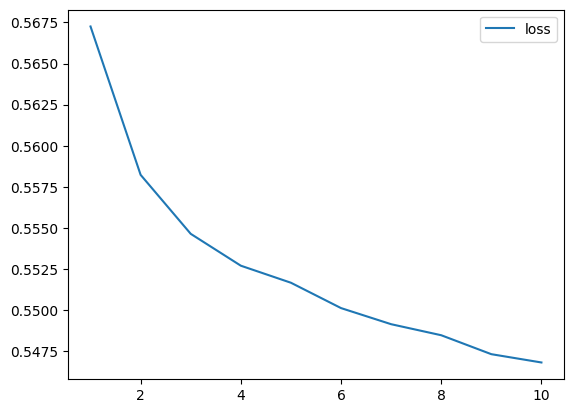

In [58]:
# Create a DataFrame containing training history
history_df_3 = pd.DataFrame(fit_model_3.history)

# Increase the index by 1 to match the number of epochs
history_df_3.index += 1

# Plot the loss
history_df_3.plot(y="loss")
plt.show()

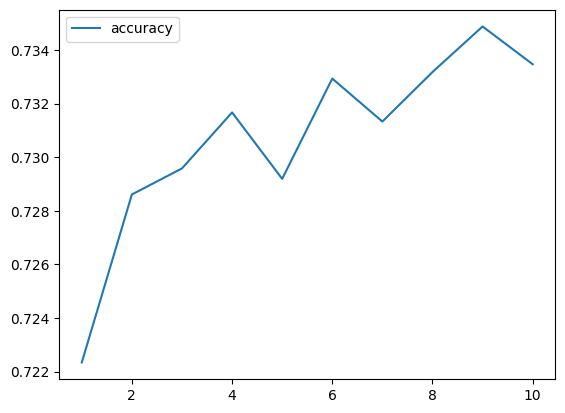

In [59]:
# Plot the accuracy
history_df_3.plot(y="accuracy")
plt.show()

In [60]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
